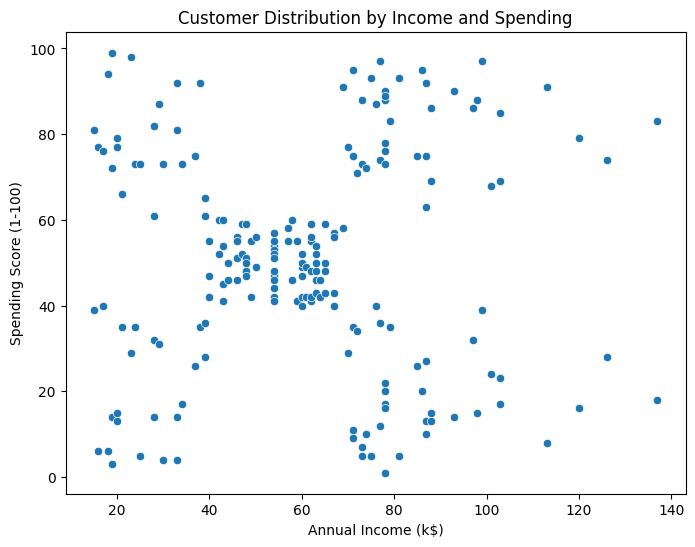


Silhouette Score (without scaling, 2 features): 0.412


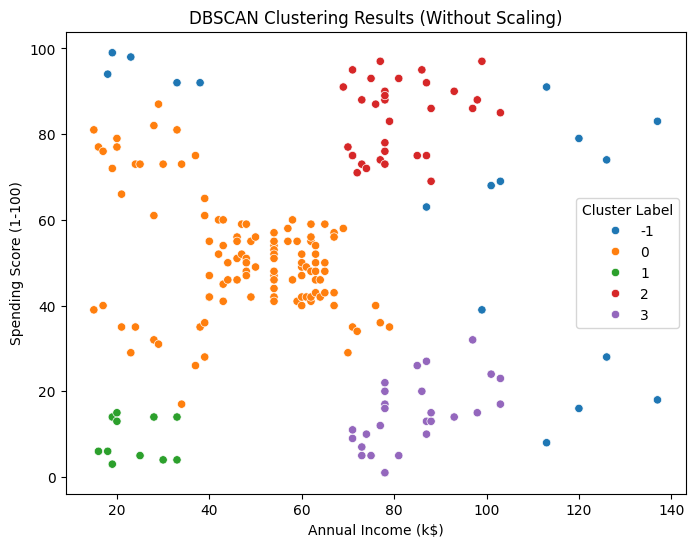


Silhouette Score (after standardization, 2 features): 0.350


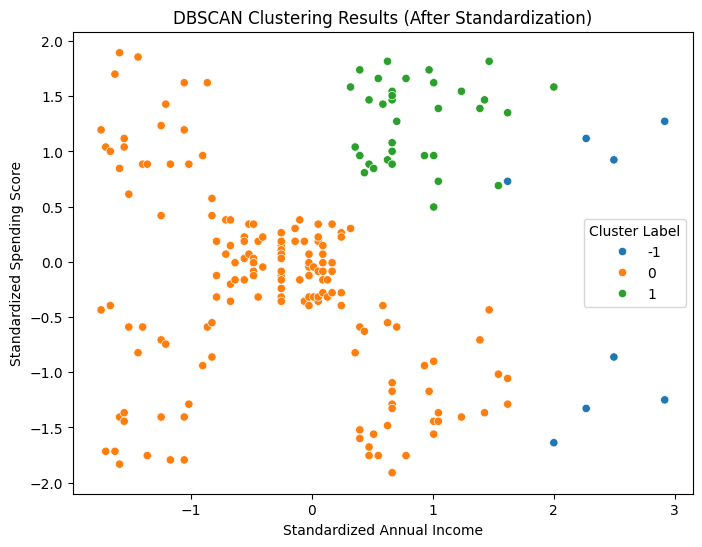


--- Student Analysis Tasks ---
1. (Conceptual) What is the meaning of eps and min_samples in DBSCAN? How do they affect the number and shape of clusters? How might they impact the Silhouette Score?
2. (Interpretation) After standardization, how many clusters and noise points (-1 label) did you observe? What do these clusters represent in terms of customer behavior? How good is the clustering according to the Silhouette Score?
3. (Hands-on) Modify the eps and/or min_samples values. For example, try eps=0.3 or min_samples=8. How does it change the clustering result and the Silhouette Score?
4. (Hands-on) Uncommenting the TODO section, change the features used for clustering by adding 'Age' as a third feature. How does including Age affect the clustering result? Visualize with the 3D scatter plot and comment on the change in Silhouette Score.


In [1]:
# DBSCAN Lab Exercise: Mall Customers Dataset

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Load the Dataset
# Dataset Description:
# The Mall Customers dataset contains demographic and spending information of customers, including:
# - CustomerID: Unique ID assigned to each customer
# - Gender: Male/Female
# - Age: Age of the customer
# - Annual Income (k$): Annual income in thousand dollars
# - Spending Score (1-100): Score assigned based on customer behavior and spending patterns
# Dataset Source: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# Load the Mall Customers dataset from a local file
url = "/content/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

# Step 3: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Visualize the Raw Data
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Step 5: Apply DBSCAN without scaling
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(X)

# Step 6: Add Cluster Labels to DataFrame
df['Cluster'] = clusters

# Step 7: Silhouette Score without scaling
if len(set(clusters)) > 1:
    silhouette_raw = silhouette_score(X, clusters)
    print(f"\nSilhouette Score (without scaling, 2 features): {silhouette_raw:.3f}")
else:
    print("\nSilhouette Score (without scaling, 2 features): Not applicable (only 1 cluster)")

# Step 8: Visualize Clustering without scaling
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', data=df)
plt.title('DBSCAN Clustering Results (Without Scaling)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()

# Step 9: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Apply DBSCAN after standardization
dbscan_scaled = DBSCAN(eps=0.5, min_samples=5)
clusters_scaled = dbscan_scaled.fit_predict(X_scaled)

# Add new cluster labels
df['Cluster_Scaled'] = clusters_scaled

# Step 11: Silhouette Score after standardization
if len(set(clusters_scaled)) > 1:
    silhouette_scaled = silhouette_score(X_scaled, clusters_scaled)
    print(f"\nSilhouette Score (after standardization, 2 features): {silhouette_scaled:.3f}")
else:
    print("\nSilhouette Score (after standardization, 2 features): Not applicable (only 1 cluster)")

# Step 12: Visualize Clustering after Scaling
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters_scaled, palette='tab10')
plt.title('DBSCAN Clustering Results (After Standardization)')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend(title='Cluster Label')
plt.show()

# -----------------------------
# TODO: Student Task 4 (Steps 13-16)
# -----------------------------

'''
# Step 13: Add 'Age' as a third feature and re-run clustering
X_new = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler_new = StandardScaler()
X_new_scaled = scaler_new.fit_transform(X_new)

dbscan_new = DBSCAN(eps=0.6, min_samples=5)
clusters_new = dbscan_new.fit_predict(X_new_scaled)

df['Cluster_New'] = clusters_new

# Step 14: Visualize new clustering (2D)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_New', palette='tab10', data=df)
plt.title('DBSCAN Clustering (Using Age, Income, and Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()

# Step 15: 3D Visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster_New'],
    cmap='tab10',
    s=50
)

ax.set_title('DBSCAN 3D Clustering: Age vs Income vs Spending')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
legend1 = ax.legend(*scatter.legend_elements(), title=\"Cluster\")
ax.add_artist(legend1)
plt.show()

# Step 16: Silhouette Score for 3-feature clustering
if len(set(clusters_new)) > 1:
    silhouette_new = silhouette_score(X_new_scaled, clusters_new)
    print(f\"\\nSilhouette Score (after adding Age, 3 features): {silhouette_new:.3f}\")
else:
    print(\"\\nSilhouette Score (after adding Age, 3 features): Not applicable (only 1 cluster)\")
'''

# Step 17: Student Analysis Tasks
print("\n--- Student Analysis Tasks ---")
print("1. (Conceptual) What is the meaning of eps and min_samples in DBSCAN? How do they affect the number and shape of clusters? How might they impact the Silhouette Score?")
print("2. (Interpretation) After standardization, how many clusters and noise points (-1 label) did you observe? What do these clusters represent in terms of customer behavior? How good is the clustering according to the Silhouette Score?")
print("3. (Hands-on) Modify the eps and/or min_samples values. For example, try eps=0.3 or min_samples=8. How does it change the clustering result and the Silhouette Score?")
print("4. (Hands-on) Uncommenting the TODO section, change the features used for clustering by adding 'Age' as a third feature. How does including Age affect the clustering result? Visualize with the 3D scatter plot and comment on the change in Silhouette Score.")


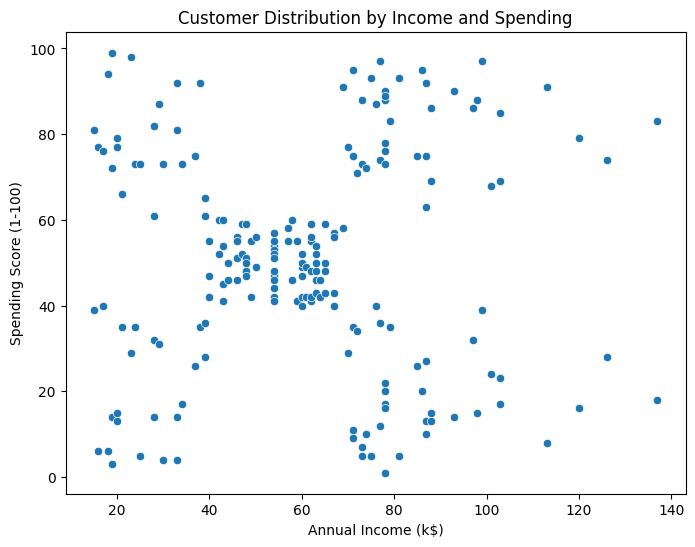


Silhouette Score (without scaling, 2 features): 0.412


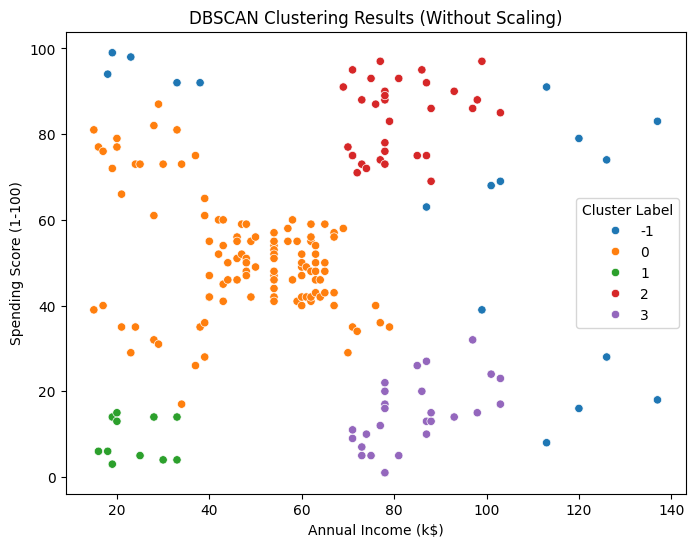


Silhouette Score (after standardization, 2 features): 0.194


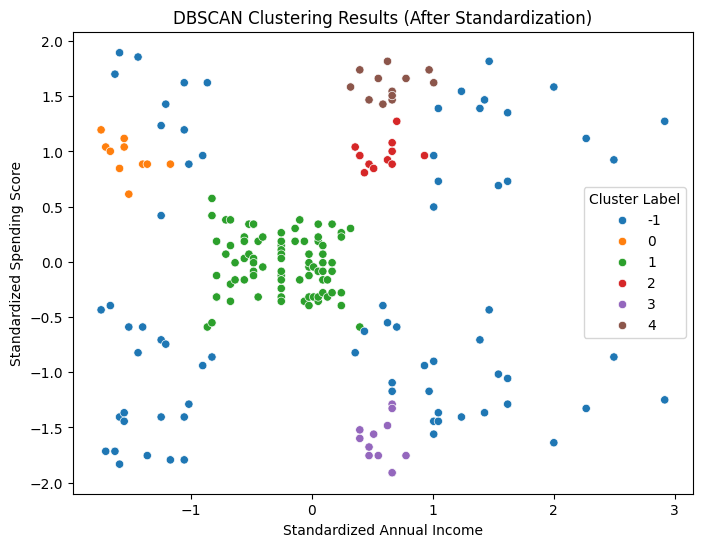


--- Student Analysis Tasks ---
1. (Conceptual) What is the meaning of eps and min_samples in DBSCAN? How do they affect the number and shape of clusters? How might they impact the Silhouette Score?
2. (Interpretation) After standardization, how many clusters and noise points (-1 label) did you observe? What do these clusters represent in terms of customer behavior? How good is the clustering according to the Silhouette Score?
3. (Hands-on) Modify the eps and/or min_samples values. For example, try eps=0.3 or min_samples=8. How does it change the clustering result and the Silhouette Score?
4. (Hands-on) Uncommenting the TODO section, change the features used for clustering by adding 'Age' as a third feature. How does including Age affect the clustering result? Visualize with the 3D scatter plot and comment on the change in Silhouette Score.


In [2]:
# DBSCAN Lab Exercise: Mall Customers Dataset

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Load the Dataset
# Dataset Description:
# The Mall Customers dataset contains demographic and spending information of customers, including:
# - CustomerID: Unique ID assigned to each customer
# - Gender: Male/Female
# - Age: Age of the customer
# - Annual Income (k$): Annual income in thousand dollars
# - Spending Score (1-100): Score assigned based on customer behavior and spending patterns
# Dataset Source: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# Load the Mall Customers dataset from a local file
url = "/content/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

# Step 3: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Visualize the Raw Data
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Step 5: Apply DBSCAN without scaling
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(X)

# Step 6: Add Cluster Labels to DataFrame
df['Cluster'] = clusters

# Step 7: Silhouette Score without scaling
if len(set(clusters)) > 1:
    silhouette_raw = silhouette_score(X, clusters)
    print(f"\nSilhouette Score (without scaling, 2 features): {silhouette_raw:.3f}")
else:
    print("\nSilhouette Score (without scaling, 2 features): Not applicable (only 1 cluster)")

# Step 8: Visualize Clustering without scaling
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', data=df)
plt.title('DBSCAN Clustering Results (Without Scaling)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()

# Step 9: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Apply DBSCAN after standardization
dbscan_scaled = DBSCAN(eps=0.3, min_samples=8)
clusters_scaled = dbscan_scaled.fit_predict(X_scaled)

# Add new cluster labels
df['Cluster_Scaled'] = clusters_scaled

# Step 11: Silhouette Score after standardization
if len(set(clusters_scaled)) > 1:
    silhouette_scaled = silhouette_score(X_scaled, clusters_scaled)
    print(f"\nSilhouette Score (after standardization, 2 features): {silhouette_scaled:.3f}")
else:
    print("\nSilhouette Score (after standardization, 2 features): Not applicable (only 1 cluster)")

# Step 12: Visualize Clustering after Scaling
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters_scaled, palette='tab10')
plt.title('DBSCAN Clustering Results (After Standardization)')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend(title='Cluster Label')
plt.show()

# -----------------------------
# TODO: Student Task 4 (Steps 13-16)
# -----------------------------

'''
# Step 13: Add 'Age' as a third feature and re-run clustering
X_new = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler_new = StandardScaler()
X_new_scaled = scaler_new.fit_transform(X_new)

dbscan_new = DBSCAN(eps=0.6, min_samples=5)
clusters_new = dbscan_new.fit_predict(X_new_scaled)

df['Cluster_New'] = clusters_new

# Step 14: Visualize new clustering (2D)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_New', palette='tab10', data=df)
plt.title('DBSCAN Clustering (Using Age, Income, and Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()

# Step 15: 3D Visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster_New'],
    cmap='tab10',
    s=50
)

ax.set_title('DBSCAN 3D Clustering: Age vs Income vs Spending')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

# Step 16: Silhouette Score for 3-feature clustering
if len(set(clusters_new)) > 1:
    silhouette_new = silhouette_score(X_new_scaled, clusters_new)
    print(f"\nSilhouette Score (after adding Age, 3 features): {silhouette_new:.3f}")
else:
    print("\nSilhouette Score (after adding Age, 3 features): Not applicable (only 1 cluster)")
'''

# Step 17: Student Analysis Tasks
print("\n--- Student Analysis Tasks ---")
print("1. (Conceptual) What is the meaning of eps and min_samples in DBSCAN? How do they affect the number and shape of clusters? How might they impact the Silhouette Score?")
print("2. (Interpretation) After standardization, how many clusters and noise points (-1 label) did you observe? What do these clusters represent in terms of customer behavior? How good is the clustering according to the Silhouette Score?")
print("3. (Hands-on) Modify the eps and/or min_samples values. For example, try eps=0.3 or min_samples=8. How does it change the clustering result and the Silhouette Score?")
print("4. (Hands-on) Uncommenting the TODO section, change the features used for clustering by adding 'Age' as a third feature. How does including Age affect the clustering result? Visualize with the 3D scatter plot and comment on the change in Silhouette Score.")


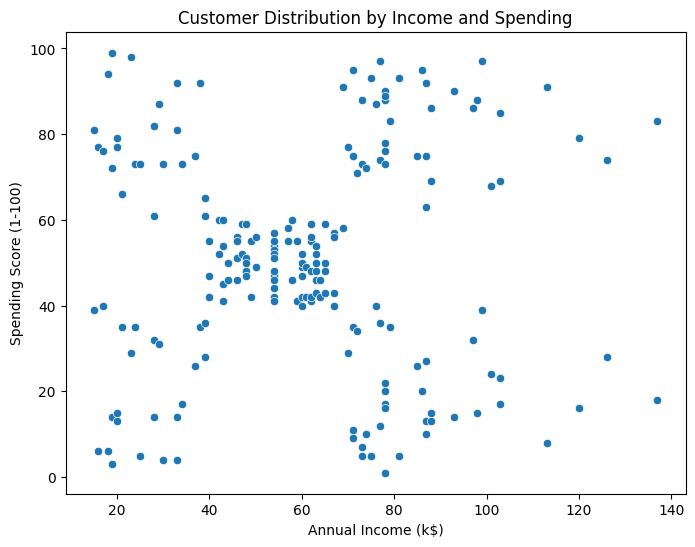


Silhouette Score (without scaling, 2 features): 0.412


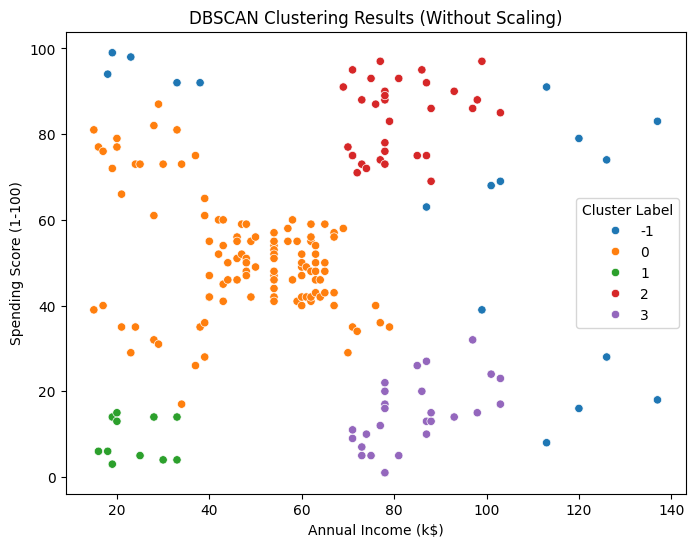


Silhouette Score (after standardization, 2 features): 0.350


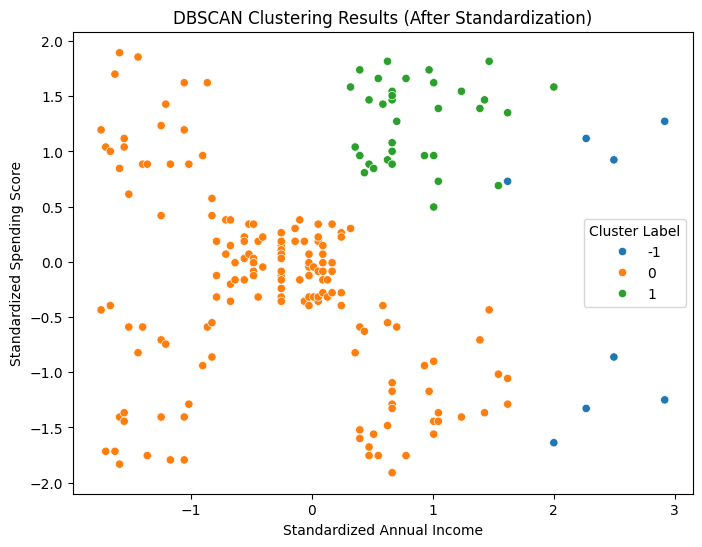

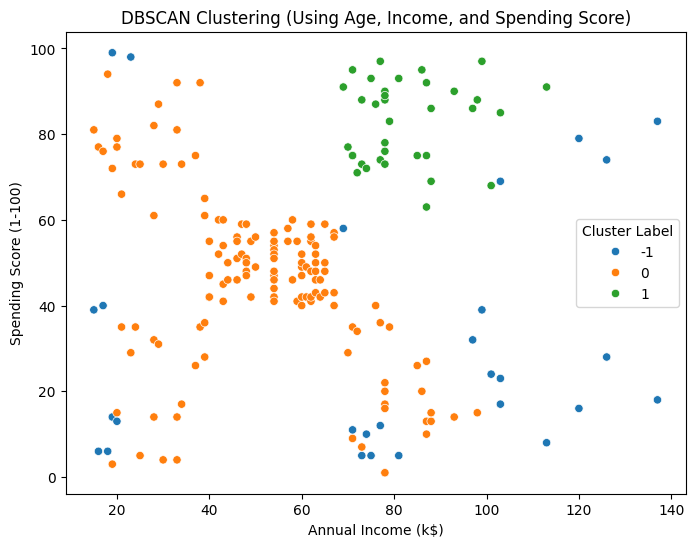

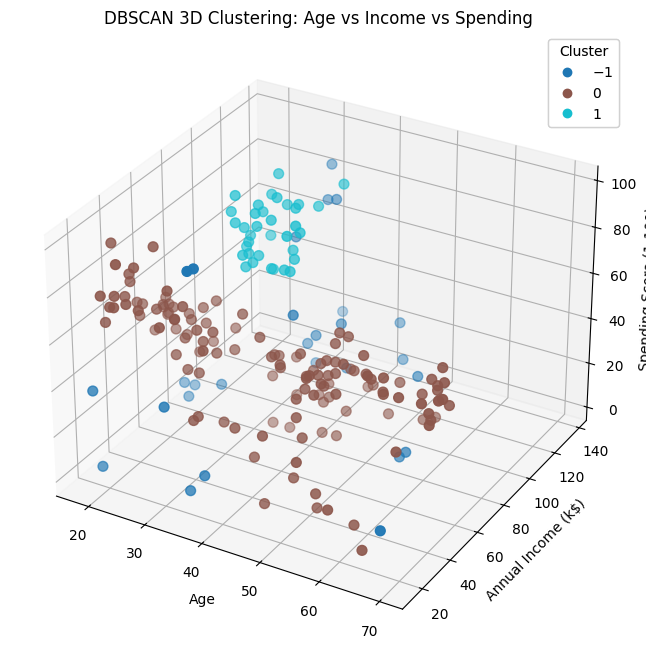


Silhouette Score (after adding Age, 3 features): 0.188

--- Student Analysis Tasks ---
1. (Conceptual) What is the meaning of eps and min_samples in DBSCAN? How do they affect the number and shape of clusters? How might they impact the Silhouette Score?
2. (Interpretation) After standardization, how many clusters and noise points (-1 label) did you observe? What do these clusters represent in terms of customer behavior? How good is the clustering according to the Silhouette Score?
3. (Hands-on) Modify the eps and/or min_samples values. For example, try eps=0.3 or min_samples=8. How does it change the clustering result and the Silhouette Score?
4. (Hands-on) Uncommenting the TODO section, change the features used for clustering by adding 'Age' as a third feature. How does including Age affect the clustering result? Visualize with the 3D scatter plot and comment on the change in Silhouette Score.


In [3]:
# DBSCAN Lab Exercise: Mall Customers Dataset

# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Step 2: Load the Dataset
# Dataset Description:
# The Mall Customers dataset contains demographic and spending information of customers, including:
# - CustomerID: Unique ID assigned to each customer
# - Gender: Male/Female
# - Age: Age of the customer
# - Annual Income (k$): Annual income in thousand dollars
# - Spending Score (1-100): Score assigned based on customer behavior and spending patterns
# Dataset Source: https://www.kaggle.com/datasets/shwetabh123/mall-customers

# Load the Mall Customers dataset from a local file
url = "/content/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

# Step 3: Select Features for Clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 4: Visualize the Raw Data
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution by Income and Spending')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Step 5: Apply DBSCAN without scaling
dbscan = DBSCAN(eps=10, min_samples=5)
clusters = dbscan.fit_predict(X)

# Step 6: Add Cluster Labels to DataFrame
df['Cluster'] = clusters

# Step 7: Silhouette Score without scaling
if len(set(clusters)) > 1:
    silhouette_raw = silhouette_score(X, clusters)
    print(f"\nSilhouette Score (without scaling, 2 features): {silhouette_raw:.3f}")
else:
    print("\nSilhouette Score (without scaling, 2 features): Not applicable (only 1 cluster)")

# Step 8: Visualize Clustering without scaling
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10', data=df)
plt.title('DBSCAN Clustering Results (Without Scaling)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()

# Step 9: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 10: Apply DBSCAN after standardization
dbscan_scaled = DBSCAN(eps=0.5, min_samples=5)
clusters_scaled = dbscan_scaled.fit_predict(X_scaled)

# Add new cluster labels
df['Cluster_Scaled'] = clusters_scaled

# Step 11: Silhouette Score after standardization
if len(set(clusters_scaled)) > 1:
    silhouette_scaled = silhouette_score(X_scaled, clusters_scaled)
    print(f"\nSilhouette Score (after standardization, 2 features): {silhouette_scaled:.3f}")
else:
    print("\nSilhouette Score (after standardization, 2 features): Not applicable (only 1 cluster)")

# Step 12: Visualize Clustering after Scaling
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=clusters_scaled, palette='tab10')
plt.title('DBSCAN Clustering Results (After Standardization)')
plt.xlabel('Standardized Annual Income')
plt.ylabel('Standardized Spending Score')
plt.legend(title='Cluster Label')
plt.show()

# -----------------------------
# TODO: Student Task 4 (Steps 13-16)
# -----------------------------


# Step 13: Add 'Age' as a third feature and re-run clustering
X_new = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler_new = StandardScaler()
X_new_scaled = scaler_new.fit_transform(X_new)

dbscan_new = DBSCAN(eps=0.6, min_samples=5)
clusters_new = dbscan_new.fit_predict(X_new_scaled)

df['Cluster_New'] = clusters_new

# Step 14: Visualize new clustering (2D)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_New', palette='tab10', data=df)
plt.title('DBSCAN Clustering (Using Age, Income, and Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster Label')
plt.show()

# Step 15: 3D Visualization
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster_New'],
    cmap='tab10',
    s=50
)

ax.set_title('DBSCAN 3D Clustering: Age vs Income vs Spending')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

# Step 16: Silhouette Score for 3-feature clustering
if len(set(clusters_new)) > 1:
    silhouette_new = silhouette_score(X_new_scaled, clusters_new)
    print(f"\nSilhouette Score (after adding Age, 3 features): {silhouette_new:.3f}")
else:
    print("\nSilhouette Score (after adding Age, 3 features): Not applicable (only 1 cluster)")

# Step 17: Student Analysis Tasks
print("\n--- Student Analysis Tasks ---")
print("1. (Conceptual) What is the meaning of eps and min_samples in DBSCAN? How do they affect the number and shape of clusters? How might they impact the Silhouette Score?")
print("2. (Interpretation) After standardization, how many clusters and noise points (-1 label) did you observe? What do these clusters represent in terms of customer behavior? How good is the clustering according to the Silhouette Score?")
print("3. (Hands-on) Modify the eps and/or min_samples values. For example, try eps=0.3 or min_samples=8. How does it change the clustering result and the Silhouette Score?")
print("4. (Hands-on) Uncommenting the TODO section, change the features used for clustering by adding 'Age' as a third feature. How does including Age affect the clustering result? Visualize with the 3D scatter plot and comment on the change in Silhouette Score.")
